#### 使用 KNN 算法实现数据划分并画出决策边界


In [ ]:
# 导入库
# 从sklearn 导入分类的库，KNeighborsClassifier 是 KNN 算法的核心分类器
from sklearn.neighbors import KNeighborsClassifier

# 导入numpy，numpy 是用于数值计算的库，主要用于处理数组
import numpy as np

# 导入画图包，matplotlib 用于数据可视化
import matplotlib.pyplot as plt

# 目前使用课件上的数据集
# 定义三个点集合，代表不同类别的数据点，分别有两个特征（例如：坐标位置）
point1 = [
    [7.7, 6.1],  # 类别 0 的点
    [3.1, 5.9],
    [8.6, 8.8],
    [9.5, 7.3],
    [3.9, 7.4],
    [5.0, 5.3],
    [1.0, 7.3],
]
point2 = [
    [0.2, 2.2],  # 类别 1 的点
    [4.5, 4.1],
    [0.5, 1.1],
    [2.7, 3.0],
    [4.7, 0.2],
    [2.9, 3.3],
    [7.3, 7.9],
]
point3 = [
    [9.2, 0.7],  # 类别 2 的点
    [9.2, 2.1],
    [7.3, 4.5],
    [8.9, 2.9],
    [9.5, 3.7],
    [7.7, 3.7],
    [9.4, 2.4],
]

# 将数据集连接起来，将三个点集合合并成一个大的数据集
# np.concatenate: 用于连接多个数组
# axis=0 表示按行进行拼接
point_concat = np.concatenate((point1, point2, point3), axis=0)

# 设置标签，将每个数据点与其对应的类别标签进行配对
# np.zeros(len(point1)) 给 point1 的所有点分配标签 0
# np.ones(len(point2)) 给 point2 的所有点分配标签 1
# np.ones(len(point3)) + 1 给 point3 的所有点分配标签 2
point_concat_label = np.concatenate(
    (np.zeros(len(point1)), np.ones(len(point2)), np.ones(len(point3)) + 1),
    axis=0,
)

# 2. 构建KNN算法，实例化KNN算法并进行训练
# 2.1 第一步实例化KNN算法，指定邻居数量、距离度量方式等参数
n_neighbors = 5  # 确定K值（即邻居数），这里设定为5

# 使用 KNeighborsClassifier 实例化 KNN 算法模型
# n_neighbors: 选择的邻居数量，指定 KNN 算法考虑的邻居数目
# algorithm: 'brute' 表示使用暴力计算方法，即计算每个点与所有点的距离
# p: 距离度量的参数，p=2 表示使用欧几里得距离
knn = KNeighborsClassifier(
    n_neighbors=n_neighbors,  # 设置 K 值为 5
    algorithm="brute",  # 使用暴力算法来计算距离
    p=2,  # 使用欧几里得距离（p=2）
)

# 训练 KNN 模型
# knn.fit() 函数会根据训练数据（point_concat）和标签（point_concat_label）来学习
# 该函数将模型拟合到数据上，学习数据的特征与标签之间的关系
knn.fit(point_concat, point_concat_label)

# 3. 实现KNN决策边界的可视化
# 通过预测坐标网格上所有点的类别来绘制决策边界
# 获得预测点数据，使用坐标点网格来当作预测数据点
# 3.1 设定未知点，生成一个坐标点网格，表示我们希望预测的点位置
x1 = np.linspace(0, 10, 100)  # 生成从0到10的100个点，作为 x 轴的坐标
# np.linspace: 生成指定范围内的等间距数值
# 第一个参数是数据的起始值，第二个参数是结束值，第三个是生成数值的个数
y1 = np.linspace(0, 10, 100)  # 生成从0到10的100个点，作为 y 轴的坐标

# 生成坐标点网格，x_axis 和 y_axis 是二维矩阵
# meshgrid 用于生成网格坐标点，用于在平面上覆盖坐标点
x_axis, y_axis = np.meshgrid(x1, y1)

# 输出网格形状（这是一个二维的网格，用来覆盖平面）
# 网格的形状（每个轴的维度）对于决策边界的绘制非常重要
y_axis.shape

# 将 x_axis 和 y_axis 展平，转化为一维数组，以便用来做预测
# 使用 ravel() 或者 flatten() 展平 2D 数组
x_axis_ravel = x_axis.ravel()
y_axis_ravel = y_axis.ravel()

# 合并两个一维数组，得到所有网格坐标的二维形式
# np.c_[] 用来按列将两个一维数组合并成一个二维数组
xy_axis = np.c_[x_axis_ravel, y_axis_ravel]

# 4. KNN预测与绘制决策边界
# 对所有坐标点进行分类预测，knn.predict 返回的是对应点的预测标签
# knn.predict() 通过KNN模型对输入的二维数据（xy_axis）进行分类预测
knn_predict_result = knn.predict(xy_axis)

# 画图展示决策边界
# 创建一个新图形，设置图形尺寸
fig = plt.figure(figsize=(15, 20))

# 添加子图，ax 表示一个图形区域
# 111 表示 1 行 1 列的第一个图
ax = fig.add_subplot(111)

# contour: 绘制等高线，表示决策边界
# 第一个和第二个参数是坐标点网格，第三个参数是每个坐标点的预测标签
# 这里将预测结果（knn_predict_result）按网格的形状重塑，以便绘制边界
ax.contour(
    x_axis,  # x 轴坐标
    y_axis,  # y 轴坐标
    knn_predict_result.reshape(x_axis.shape),  # 将预测结果按网格形状重塑
)

# 绘制原始点的散点图
# ax.scatter 用于绘制散点，分为三个类别
# point_concat[point_concat_label == 0, 0]
# 和 point_concat[point_concat_label == 0, 1]
# 用于筛选属于类别 0 的点
ax.scatter(
    point_concat[point_concat_label == 0, 0],  # 类别 0 的 x 坐标
    point_concat[point_concat_label == 0, 1],  # 类别 0 的 y 坐标
    color="b",  # 蓝色
    marker="^",  # 使用三角形标记
)

ax.scatter(
    point_concat[point_concat_label == 1, 0],  # 类别 1 的 x 坐标
    point_concat[point_concat_label == 1, 1],  # 类别 1 的 y 坐标
    color="r",  # 红色
    marker="*",  # 使用星形标记
)

ax.scatter(
    point_concat[
        point_concat_label == 2,
        0,
    ],  # 类别 2 的 x 坐标
    point_concat[
        point_concat_label == 2,
        1,
    ],  # 类别 2 的 y 坐标
    color="y",  # 黄色
    marker="s",  # 使用方形标记
)

# 显示图形
# plt.show() 展示整个图形，确保图形可视化
plt.show()

#### 欧式距离(Euclidean Distance)代码复现


In [6]:
# 编写 eucalidean-distance（L2：欧氏距离）
# 欧氏距离（Euclidean Distance）也叫 L2 距离，
# 是机器学习中最常见的距离度量方式之一。

# 导入数学公式库（本例中未直接使用 math，但保留以示用途）
import math

# 导入 NumPy，用于数组运算
import numpy as np

# 构建两个二维数据点（列表表示）
x_point = [7.3, 4.5]
y_point = [6, 4.2]


# -------------------------------------------------------
# 第一种方法：使用 Python 原生循环手写欧氏距离
# -------------------------------------------------------
def eucalidean_distance(x_point, y_point):
    """
    手动实现欧氏距离：
    1. zip(x_point, y_point) 将对应维度打包成 (7.3,6), (4.5,4.2)
    2. 对每一维执行 (a - b)^2
    3. 将所有维度的平方和求和
    4. 最后开平方根 sqrt(sum)
    """
    sum = 0  # 初始化平方和
    for a, b in zip(x_point, y_point):
        # 计算每一维的差值平方并累加
        sum = sum + (a - b) ** 2

    # 对平方和开根号，就是欧氏距离
    return np.sqrt(sum)


# 调用第一种方法
ed = eucalidean_distance(x_point, y_point)
print(f"ed: {ed}")


# -------------------------------------------------------
# 第二种方法：使用 NumPy 的向量化运算
# -------------------------------------------------------
def eucalidean_distance_1(x_point, y_point):
    """
    使用 NumPy 实现欧氏距离（向量化版本）：
    1. 将 Python 列表转成 NumPy 数组
    2. (x_1 - y_1) 会对对应维度自动相减 → 得到差值向量
    3. **2 会对差值向量的每个元素平方
    4. np.sum() 求所有维度平方的总和
    5. 最后 sqrt 开平方根
    """
    x_1 = np.array(x_point)  # 转成 NumPy 数组
    y_1 = np.array(y_point)

    # 典型欧氏距离公式 sqrt(sum((x - y)^2))
    return np.sqrt(np.sum((x_1 - y_1) ** 2))


# 调用第二种方法
ed1 = eucalidean_distance_1(x_point, y_point)
print(f"ed1: {ed1}")

ed:1.334166406412633
ed1:1.334166406412633


#### 曼哈顿距离(Manhattan Distance)代码复现

In [5]:
# 曼哈顿距离（Manhattan Distance）
# 又称“城市街区距离”，来源于在城市网格中从一点走到另一点只能直上直下、左右移动，
# 所以其数学形式是：所有维度差值的绝对值相加（L1 距离）

import math
import numpy as np

# -------------------------------------------
# 创建两个 n 维点 x 和 y(路径中的店)
# -------------------------------------------
x = [1, 2, 3, 5, 6]
y = [4, 6, 7, 8, 9]


# --------------------------------------------------------
# 第一种方法：使用 Python 原生写法计算曼哈顿距离（手写 L1）
# --------------------------------------------------------
def manhattan_distance(x: list, y: list) -> int:
    """
    计算曼哈顿距离的手写方式：
    1. zip(x, y) 将每一维度对应的数据打包在一起
       → (1,4), (2,6), (3,7), (5,8), (6,9)
    2. 对每组数据求差值的绝对值 abs(a - b)
    3. 将所有维度的绝对值差相加
       → L1 距离公式：sum(|x_i - y_i|)
    """
    sum = 0
    for a, b in zip(x, y):
        # abs(a - b) 是两点该维度上的“街区”距离
        sum = sum + abs(a - b)
    return sum


md = manhattan_distance(x, y)
print(f"md: {md}")


# --------------------------------------------------------
# 第二种方法：使用 NumPy 的向量化计算曼哈顿距离
# --------------------------------------------------------
def manhattan_distance_1(x: list, y: list) -> int:
    """
    用 NumPy 实现曼哈顿距离：
    1. 将 Python 列表转换为 NumPy 数组，便于向量化运算
    2. (x_1 - y_1) 会对所有维度执行向量减法
    3. np.abs() 对每个维度求绝对值
    4. np.sum() 将所有维度的绝对值差累加
    """
    x_1 = np.array(x)
    y_1 = np.array(y)

    # L1 距离公式：sum(|x_i - y_i|)
    return np.sum(np.abs(x_1 - y_1))


md1 = manhattan_distance_1(x, y)
print(f"md1: {md1}")

md: 17
md1: 17


#### 切比雪夫距离 (Chebyshev Distance)的代码实现

In [9]:
# 切比雪夫距离（Chebyshev Distance）
# 又称 L∞ 距离（L-infinity），或国际象棋中王的距离。
# 特点：两点之间的距离 = 各维度绝对差值中的最大值。
# 换句话说，是“走棋盘的国王所需的最少步数”。

import math
import numpy as np

# -------------------------------------------------------
# 创建两个二维点 x 和 y
# -------------------------------------------------------
x = [1, 2]
y = [4, 6]


# -------------------------------------------------------
# 方法一：手动计算切比雪夫距离
# -------------------------------------------------------
def chebyshev_distance(x: list, y: list) -> list:
    """
    手写切比雪夫距离步骤：
    1. zip(x, y) 将每一维度配对，如 (1,4), (2,6)
    2. 对每一维度计算差值的绝对值 abs(a - b)
       → 得到各维度的“坐标差”
    3. 切比雪夫距离 = 这些差值中的最大值
       但此函数返回的是差值列表，用于展示中间过程
    """
    max_list = []
    for a, b in zip(x, y):  # 将对应维度配对
        max_list.append(abs(a - b))  # 保存每一维度的差值绝对值
    return max_list  # 返回差值列表（未取最大值）


# 查看方法一的中间结果（差值列表）
cd = chebyshev_distance(x, y)
print(f"cd: {cd}")  # 输出示例：cd: [3, 4]


# -------------------------------------------------------
# 方法二：使用 NumPy 计算切比雪夫距离（最终结果）
# -------------------------------------------------------
def chebyshev_distance_1(x: list, y: list) -> list:
    """
    NumPy 版切比雪夫距离：
    1. 将列表转换为 NumPy 数组，便于向量化计算
    2. x_1 - y_1 会对每一维数据自动进行相减
    3. np.abs(...) 得到各维度的绝对差值
    4. np.max(...) 获取所有维度中绝对差值最大的那一个
       → 这就是切比雪夫距离（L∞）
    """
    x_1 = np.array(x)  # 转换为 NumPy 数组
    y_1 = np.array(y)
    return np.max(np.abs(x_1 - y_1))  # L∞ = max(|xi - yi|)


# 查看方法二的最终切比雪夫距离
cd1 = chebyshev_distance_1(x, y)
print(f"cd1: {cd1}")  # 输出示例：cd1: 4

cd:[3, 4]
cd14


#### 闵可夫斯基距离(Minkowski Distance)代码实现

In [ ]:
import math
import numpy as np

# 计算闵可夫斯基距离（Minkowski Distance）
# 闵可夫斯基距离是 Lp 距离的统称，当 p 不同，它可以变成：
#   p = 1 → 曼哈顿距离（L1）
#   p = 2 → 欧氏距离（L2）
#   p → ∞ → 切比雪夫距离（L∞）

# 创建两个点 x 和 y
x = [1, 2]
y = [4, 6]

# 定义 p，表示闵可夫斯基距离中的参数
p = 10


def MinkowskiDistance(x, y, p):
    """
    闵可夫斯基距离通用公式：
        d(x, y) = ( Σ |xi - yi|^p )^(1/p)

    当 p = 1 时：曼哈顿距离 (L1)
    当 p = 2 时：欧氏距离 (L2)
    当 p → ∞ 时：切比雪夫距离 (L∞) = max(|xi - yi|)

    本函数实现逻辑：
    1. 将 x 和 y 转换成 NumPy 数组，便于向量化计算
    2. 如果 p = 1 或 p = 2，直接应用通用 Minkowski 公式
    3. 否则视为趋近于 ∞，返回最大差值（L∞）
    """

    # 转为 NumPy 数组
    x = np.array(x)
    y = np.array(y)

    # p = 1 或 p = 2 时使用 Minkowski 公式
    if p == 1 or p == 2:
        # np.abs(x - y)  → 每维差值的绝对值，如 [3, 4]
        # np.power(..., p) → 对每一维取 p 次幂
        # np.sum(...)       → 求所有维度的和
        # np.power(..., 1/p)→ 最后对和取 1/p 次幂
        test_num = np.power(np.sum(np.power(np.abs(x - y), p)), 1 / p)
        return test_num

    else:
        # p 不等于 1 或 2 时，这段代码相当于实现 p → ∞ 的情况
        # Minkowski 距离在 p → ∞ 时极限为：max(|xi - yi|)
        return np.max(np.abs(x - y))


# 调用函数
md = MinkowskiDistance(x, y, p)
print(f"md: {md}")

##### 余弦距离(Cosine Distance)代码实现

In [ ]:
import math
import numpy as np

# 计算余弦距离
# 建立两个数据点
x = [1, 1]
y = [2, -2]


# 计算余弦距离
def consine_similarity(x, y):
    # 单独求分子分母
    # 分子初始化0
    numerator = 0
    # 分母初始化为0
    denominator = 0
    denominator_x = 0
    denominator_y = 0
    for a, b in zip(x, y):
        # 求分子
        numerator = numerator + a * b
        # 求分母
        denominator_x = denominator_x + a**2
        denominator_y = denominator_y + b**2
    denominator = math.sqrt(denominator_x) * math.sqrt(denominator_y)
    if denominator > 0:
        return numerator / denominator
    return 0


cs = consine_similarity(x, y)
print(f"cs:{cd}")

##### 杰卡德距离(Jaccard Distance)代码实现

In [10]:
import math
import numpy as np

# jaccrd 相似系数
# 先建立两个集合
x_set = {1, 2, 3}
y_set = {2, 3, 4}


# jaccrd 相似系数计算
def jaccrd_similarity_coefficient(x_set, y_set):
    # 分子
    # 这里的&操作不是按位想与是集合的交集操作
    isinstance = len(set(x_set) & set(y_set))
    union = len(set(x_set) | set(y_set))
    if union > 0:
        return isinstance / union
    return 0


jsc = jaccrd_similarity_coefficient(x_set, y_set)
print(f"jsc距离:{jsc}")

jsc距离:0.5


#### K-折交叉验证（K-fold Cross Validation，记为 K-CV）代码实现


In [13]:
# KFold交叉验证示例
# 作用：将数据集均匀地分成 K 份，轮流做训练集和测试集，
#       用于更稳定地评估模型的泛化能力。

from sklearn.model_selection import KFold
from sklearn.datasets import load_iris

# ----------------------------------------------------------
# 1. 加载 iris 鸢尾花数据集
# ----------------------------------------------------------
# iris 是最经典的分类数据集，包含：
#   - 150 条数据
#   - 4 个特征（花萼、花瓣的长宽）
#   - 3 个类别（setosa / versicolor / virginica）
iris = load_iris()

# X → 特征矩阵（150 行 × 4 列）
# Y → 标签（对应每朵花的种类）
X = iris.data
Y = iris.target

# ----------------------------------------------------------
# 2. 创建一个 KFold 对象
# ----------------------------------------------------------
# n_splits=5 表示将数据集平均分成 5 份
# 每次取 1 份做测试，剩下 4 份做训练，一共重复 5 次
kf = KFold(n_splits=5)

# ----------------------------------------------------------
# 3. 使用 KFold 对数据进行切分
# ----------------------------------------------------------
# kf.split(X) 会返回一个生成器，每次返回：
#   - train_index：训练集索引
#   - test_index：测试集索引
#
# enumerate() 用来给循环添加编号（i 从 0 开始，所以加 1）,就是为了给i赋值没有别的用处
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # 输出第几折（Fold）
    print(f"F{i+1}")

    # 输出训练集的行号索引
    print(f"Train index = {train_index}")

    # 输出测试集的行号索引
    print(f"Test index  = {test_index}")

F1
Train index = [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
Test index  = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
F2
Train index = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 1

#### k-近邻算法API解读

In [ ]:
class sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
):
    """
    KNeighborsClassifier: 基于 K 近邻（KNN）的分类器

    该模型通过计算测试样本与训练样本在特征空间上的距离，
    选取最近的 K 个邻居，根据邻居的类别进行投票或加权投票，从而得到预测结果。
    KNN 是一种“基于实例”的惰性学习算法，不需要训练过程，预测阶段计算量大。

    Parameters
    ----------
    n_neighbors : int, default=5
        邻居数量，即 K 值。决定参与投票的样本数量。
        
        - K 小（如 1~3）：容易过拟合，决策边界复杂。
        - K 大（如 20~50）：容易欠拟合，边界过于平滑。
        - 常用经验：奇数 K（避免二分类平票），K ≈ sqrt(N)

    weights : {'uniform', 'distance'} or callable, default='uniform'
        邻居权重，用于决定每个邻居在投票时的重要程度。

        - 'uniform'  
            所有邻居权重相同。多数票分类，简单但对噪声敏感。
        
        - 'distance'  
            权重 = 1 / 距离  
            越近的点影响越大，边界更自然，常用于连续值样本。

        - callable  
            用户自定义权重函数，输入为 shape=(n_neighbors,) 的距离数组，
            输出同形状的权重数组。

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        搜索最近邻的算法：

        - 'kd_tree'  
            基于空间划分，低维高效（<20 维），高维退化为线性扫描。
        
        - 'ball_tree'  
            以超球划分空间，适合高维（>20维）数据。
        
        - 'brute'  
            暴力搜索，计算所有样本距离，作为兜底方法。
        
        - 'auto'  
            自动选择最适合的算法。

        注：当 sample 数量巨大或维度非常高时，brute 可能更快。

    leaf_size : int, default=30
        KDTree 或 BallTree 的叶子节点容量。影响构建与查询速度和内存占用。

        - 小 leaf_size → 树更深 → 查询更快但构建更慢  
        - 大 leaf_size → 树更浅 → 构建快但查询稍慢  
        默认值对大多数任务已足够稳定。

    p : int, default=2
        Minkowski 距离的 p 值，决定使用的 Lp 距离。

        常用距离对应关系：
            p = 1 → 曼哈顿距离 (L1)
            p = 2 → 欧氏距离 (L2)
            p = ∞ → 切比雪夫距离（取 max）

        调参建议：
            - L1: 对异常值更稳健
            - L2: 默认选择，适合大多数任务

    metric : str or callable, default='minkowski'
        用于计算距离的度量方法。

        常见取值：
            'euclidean', 'manhattan', 'chebyshev', 'minkowski'
        
        若 metric 与 p 配合：
            - metric='minkowski' + p=2 → 欧氏距离
            - metric='minkowski' + p=1 → 曼哈顿距离

        也可传入自定义距离函数。

    metric_params : dict, optional
        为距离函数 metric 传递额外参数。例如：
            metric='mahalanobis', metric_params={'V': covariance_matrix}

    n_jobs : int, optional
        并行查找邻居的 CPU 核数。
        
        - None → 只用一个核心
        - -1 → 使用所有 CPU
        - 正整数 → 指定核心数量
        
        仅影响 kneighbors 查询阶段，不影响 fit()。

    Notes
    -----
    - KNN 是惰性学习，不需要训练，但预测阶段复杂度高。
    - 对特征尺度敏感：通常需要归一化或标准化处理（StandardScaler / MinMaxScaler）。
    - 适合小数据集，不适合海量样本（距离计算成本高）。
    - 适合决策边界平滑的数据，不适合高噪声数据。

    Examples
    --------
    >>> from sklearn.neighbors import KNeighborsClassifier
    >>> clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
    >>> clf.fit(X_train, y_train)
    >>> clf.predict(X_test)
    """

    pass


#### KNN算法实现鸢尾花数据集分类

>                     ┌──────────────────────────────┐
>                     │        原始数据（iris）       │
>                     │ 150 条样本 × 4 个特征 × 3 类别 │
>                     └──────────────────────────────┘
>                                       │
>                                       ▼
>                     ┌──────────────────────────────┐
>                     │  数据拆分：train_test_split   │
>                     │  目的：让模型只能看到训练集，  │
>                     │  测试集用来检验泛化能力       │
>                     └──────────────────────────────┘
>                                       │
>                                       ▼
>              ┌─────────────────────────────────────────────────┐
>              │                 特征工程（预处理）              │
>              │ ┌─────────────────────────────────────────────┐ │
>              │ │ 训练集：fit_transform → “学习规则 + 转换数据”│ │
>              │ └─────────────────────────────────────────────┘ │
>              │         规则包括：均值、标准差 或 最大值、最小值 │
>              └─────────────────────────────────────────────────┘
>                                       │
>                                       ▼
>                     ┌──────────────────────────────┐
>                     │     构建模型（KNN实例化）     │
>                     │ knn = KNeighborsClassifier(k)│
>                     │ 选择 K 值决定邻居数量          │
>                     └──────────────────────────────┘
>                                       │
>                                       ▼
>                     ┌──────────────────────────────┐
>                     │          模型训练（fit）      │
>                     │   目的：让模型“记住训练集”    │
>                     │    KNN = 存下训练数据和标签   │
>                     └──────────────────────────────┘
>                                       │
>                                       ▼
>              ┌─────────────────────────────────────────────────┐
>              │              特征工程（测试集）                │
>              │ transform → 使用训练集 **已学到的规则** 来转换 │
>              │ 目的：保持规则一致性，避免数据泄漏             │
>              └─────────────────────────────────────────────────┘
>                                       │
>                                       ▼
>                     ┌──────────────────────────────┐
>                     │       模型预测（predict）     │
>                     │   对每条测试数据找到最近的 K 个 │
>                     │   邻居，通过“投票”得到分类结果 │
>                     └──────────────────────────────┘
>                                       │
>                                       ▼
>                     ┌──────────────────────────────┐
>                     │       模型评估（score）       │
>                     │   准确率 = 正确数量 / 全部数量 │
>                     │   用于判断模型是否具备泛化能力 │
>                     └──────────────────────────────┘


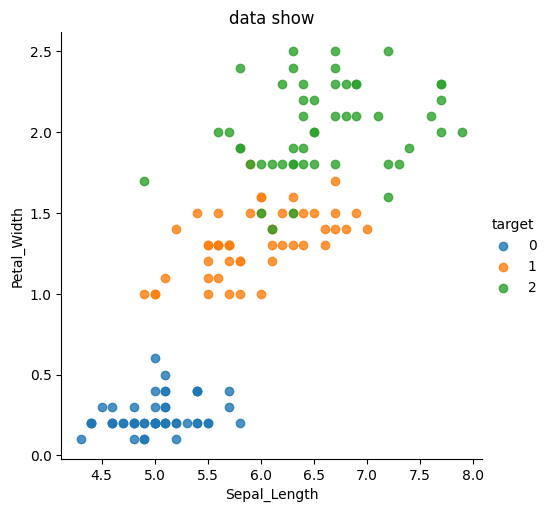

训练集的特征值是 ： 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]

In [20]:
# 导入鸢尾花数据集
from sklearn.datasets import (
    load_iris,
)  # sklearn 自带的经典多分类数据集，用来做分类练习，包含150条花的特征数据

# 数据可视化包
import seaborn as sns  # 基于 matplotlib 的可视化库，画图更美观，常用于统计图
import matplotlib.pyplot as plt  # 最基础的绘图库，用于画折线图、散点图、直方图等
import pandas as pd  # 用于数据处理和数据表结构（DataFrame），方便查看和操作数据

# 训练集与测试集拆分
from sklearn.model_selection import train_test_split

# 功能：把数据分成训练集和测试集，例如 70% 训练、30% 测试

# 数据预处理：归一化与标准化
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler：把数据缩放到 [0, 1] 区间，保持形状不变，只拉伸或压缩特征范围

from sklearn.preprocessing import StandardScaler

# StandardScaler：标准化数据，让数据变成均值 0、标准差 1，有利于提升模型训练效果

# 导入 KNN 分类模型
from sklearn.neighbors import KNeighborsClassifier

# 实现 K 最近邻算法（KNN），通过计算距离来判断新样本属于哪个类别
# 获取鸢尾花数据集（Iris Dataset）
# load_iris() 返回的是一个 Bunch 对象，类似字典，包含以下内容：
# -----------------------------------------------------------
# iris.data        : 特征矩阵（150 行 × 4 列）
#                    每朵花的 4 个实测特征，单位为 cm，而不是占比
#                    [萼片长度, 萼片宽度, 花瓣长度, 花瓣宽度]
#
# iris.target      : 标签向量（长度 150 -> 每个数据都有一个所以长度是150）
#                    表示每朵花的品种类别：
#                    0 = Setosa（山鸢尾）
#                    1 = Versicolor（变色鸢尾）
#                    2 = Virginica（维吉尼亚鸢尾）
#
# iris.feature_names : 特征名称（字符串列表）
# iris.target_names  : 类别名称（字符串列表）
#
# 本数据集共 150 条样本，是机器学习分类任务中最经典的小型示例数据集。
# 特点：结构简单、特征明确、线性可分，非常适合作为入门练习。
# -----------------------------------------------------------
iris = load_iris()
# print("鸢尾花的特征值：\n",iris['data'])
# print("鸢尾花的目标值：\n",iris['target'])
# print("鸢尾花的特征的名字：\n",iris['feature_names'])
# print("鸢尾花的目标值的名字：\n",iris['target_names'])
# print("鸢尾花的描述：\n",iris['DESCR'])
# -----------------------------------------------------------
# 数据可视化----只是为了数据可视化
iris_data1 = pd.DataFrame(
    data=iris["data"],
    columns=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"],
)
print("")
# 填充目标值
iris_data1["target"] = iris["target"]


# print(iris_data1)
# 画图展示函数：用于可视化鸢尾花不同特征之间的关系
def plot_iris(data, col1, col2):
    # data : DataFrame 格式的数据集（通常是 iris_data1）
    #        必须包含特征列和名为 "target" 的标签列，用于颜色区分品种
    #
    # col1 : 字符串，作为横轴（X-axis）使用的特征列名
    # col2 : 字符串，作为纵轴（Y-axis）使用的特征列名
    #
    # sns.lmplot 参数说明：
    # x        → 指定横轴使用的列名（这里是 col1）
    # y        → 指定纵轴使用的列名（这里是 col2）
    # data     → 数据源 DataFrame（data）
    # hue      → 按照不同类别上色，这里使用 "target" 来区分三种鸢尾花
    # fit_reg  → 是否绘制线性回归趋势线，设置为 False 表示只画散点，不画回归线
    sns.lmplot(
        x=col1,
        y=col2,
        data=data,
        hue="target",
        fit_reg=False,
    )

    # 设置图标题和坐标轴标签
    plt.title(r"data show")  # 图标题
    plt.xlabel(col1)  # X轴 名称
    plt.ylabel(col2)  # Y轴 名称
    plt.show()  # 显示图形


# 调用函数：显示萼片长度 vs 花瓣宽度 的分布情况
plot_iris(iris_data1, "Sepal_Length", "Petal_Width")
# 数据集的划分
# 机器学习一般的数据集划分分为两部分
#     1. 训练数据：用于训练，构建模型
#     2. 测试数据：在模型校验时使用，用于评估模型是否有效
# 划分比例：
#     1. 训练集 ： 70%    80%    75%
#     2. 测试集 ： 30%    20%    25%
# 数据集的划分
# 将数据集拆分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    iris["data"],  # 特征矩阵（X），包含 4 个特征：萼片长/宽、花瓣长/宽
    iris["target"],  # 标签向量（y），每朵花的品种编号（0/1/2）
    test_size=0.2,  # 测试集占比：0.2 表示 20% 测试集、80% 训练集
    random_state=42,  # 随机种子，使每次拆分结果一致（便于复现实验）
)
# 变量说明：
# x_train : 训练集的特征数据（用于训练模型）
# x_test  : 测试集的特征数据（用于模型评估）
# y_train : 训练集的标签数据（与 x_train 对应）
# y_test  : 测试集的标签数据（与 x_test 对应）

print("训练集的特征值是 ： \n", x_train)
print("测试集的特征值是 ： \n", x_test)
print("训练集的目标值是 ： \n", y_train)
print("测试集的目标值是 ： \n", y_test)
# 特征数据预处理API

# ----------------------------------------------------
# 1. 特征工程：归一化（Min-Max Normalization）
# 目的：把不同量纲、不同范围的特征拉到相同区间，避免某些特征因数值大而“压过”其他特征
#       KNN 属于距离度量模型，对特征尺度非常敏感，所以必须做缩放
# ----------------------------------------------------

# 实例化 MinMaxScaler，把每列特征缩放到 [0, 1]
transfer = MinMaxScaler(feature_range=(0, 1))

# 使用训练集进行 fit（求 min/max）并 transform（缩放）
ret_maxmin_train_data = transfer.fit_transform(
    x_train
)  # 因为不是模型所以不需要标签只需要数据就行

# 目的：测试集只能用训练集的缩放规则，不能重新学习 min/max（避免数据泄漏）
ret_maxmin_test_data = transfer.transform(x_test)


# ----------------------------------------------------
# 2. 特征工程：标准化（Standardization）
# 目的：把数据变成“均值=0、标准差=1”的分布，让模型在不同维度上权重均衡
#       标准化更适合 KNN、SVM、逻辑回归等模型
# ----------------------------------------------------

# 实例化 StandardScaler，用于标准化特征数据
transfer1 = StandardScaler()

# fit_transform：学习训练集的均值/标准差，然后标准化训练集
ret_train_data = transfer1.fit_transform(x_train)

# transform：用训练集的均值/标准差标准化测试集
ret_test_data = transfer1.transform(x_test)


# ----------------------------------------------------
# 3. 构建 KNN 模型
# 目的：让模型能够“根据距离”判断类别，KNN 本质上是找最邻近的 K 个样本投票
# ----------------------------------------------------

# 设置 K 值（选择5个最近邻参与投票）
n_neighbors_num = 5

# 创建 KNN 分类器对象
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors_num)

# 用标准化后的训练数据训练模型
# 目的：模型记住特征空间中样本的位置关系，之后用于距离判断
knn_model.fit(ret_train_data, y_train)


# ----------------------------------------------------
# 4. 使用模型预测 & 模型评估
# 目的：验证模型在未见过的测试集上的表现，判断是否具备泛化能力
# ----------------------------------------------------

# 预测测试集的类别（返回预测标签）
y_pre = knn_model.predict(ret_test_data)

print("预测值是\n", y_pre)
print("预测值和真实值的对比是:\n", y_pre == y_test)

# 使用 score() 计算准确率（正确预测数量 / 总数）
# 注意：必须使用与训练同样预处理方式后的数据，否则精度会崩
score = knn_model.score(ret_test_data, y_test)
print(f"准确率是：{score}")

#### 学习率与斜率法代码

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1.散点输入
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7],
]
# 转化为数组
data = np.array(data)
# 提取 x_data 和y_data
x_data = data[:, 0]
y_data = data[:, 1]


# 2.定义损失函数mse本次使用的损失函数
def loss_function(
    w,  # 输入的权重值
    b,  # 输入的偏置
    x_data,  # 输入的数据
    y_data,  # 实际的结果值
):
    # 活得预测值
    y_predicted = w * x_data + b  # 使用训练得到的w和b对输入数据进行预测
    # 计算均方误差mse
    e = np.mean((y_data - y_predicted) ** 2)
    # np.mean((y_data-(w*x_data+b))**2)
    return e


# 3.参数初始化
w = 0
b = 0
# 超参数
lr = 0.01  # 学习率
w_old = w
b_old = b
# 定义迭代次数（相对于训练次数）
num_iterations = 100
# range 表示从1开始迭代主要是避免产生歧义
for i in range(1, num_iterations):
    # 前向计算
    tangent_loss = loss_function(w_old, b_old, x_data, y_data)
    print(tangent_loss, w_old)

    # 计算斜率
    tangent_slople = -2 * np.mean(x_data * y_data) + 2 * w_old * np.mean(x_data**2)
    w_new = w_old - lr * tangent_slople
    w_old = w_new

#### 包含画图的学习率与斜率法组合的反向传播模型

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1.散点输入
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7],
]
# 转化为数组
data = np.array(data)
# 提取 x_data 和y_data
x_data = data[:, 0]
y_data = data[:, 1]


# 2.定义损失函数mse 本次使用的损失函数
def loss_function(
    w,  # 输入的权重
    b,  # 输入的偏置
    x_data,  # 输入的数据
    y_data,  # 实际的结果值
):
    # 获得预测值
    y_predicted = w * x_data + b  # 使用训练得到的w和b对输入数据进行预测
    # 计算均方差
    e = np.mean((y_data - y_predicted) ** 2)
    # np.mean((y_data-(w*x_data+b))**2)
    return e
# 3.参数初始化

SyntaxError: incomplete input (4287966065.py, line 25)